In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy
import sparse

%matplotlib inline

In [2]:
def show_slices(slices, cmap="gray"):
    # This function comes from the nibabel
    # tutorial --> https://nipy.org/nibabel/coordinate_systems.html#introducing-someone
    
    fig, axes = plt.subplots(1, len(slices))

    for i, slice in enumerate(slices):
        im = axes[i].imshow(slice.T, cmap=cmap, origin="lower")
        
    plt.show()

In [3]:
def contour_slices(slices, cmap="gray", total_levels=6):
    # This function includes also plotting contour plot
    # link --> https://www.python-course.eu/matplotlib_contour_plot.php
    # link --> https://github.com/silx-kit/silx/issues/2242
    
    fig, axes = plt.subplots(1, len(slices), figsize=(5,5))
    contour_levels = total_levels
    titles = ['sagital', 'coronal', 'axial']
    
    for i, slice in enumerate(slices):
        row, col = np.shape(slice)
        y = np.arange(0, row)
        x = np.arange(0, col)
        xx, yy = np.meshgrid(x, y)

        
        zzmin, zzmax = np.min(slice), np.max(slice)
        levels = np.linspace(zzmin, zzmax, contour_levels)

        #Display image with contour plot
        im = axes[i].imshow(slice.T, cmap=cmap, origin="lower")
        contour = axes[i].contour(yy, xx, slice, levels)
        axes[i].clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
        c = ('#ff0000', '#ffff00', '#0000FF', '0.6', 'c', 'm')
        contour_filled = axes[i].contourf(yy, xx, slice, colors=c)

        
    plt.show()

In [4]:
MICCAI_DIR=os.path.join("/data1/local+data", 
                         "MICCAI_2016")

print("{0}".format(80 * "-"))

print("MICCAI_DIR is {0}".format(MICCAI_DIR))

print("{0}".format(80 * "-"))


--------------------------------------------------------------------------------
MICCAI_DIR is /data1/local+data/MICCAI_2016
--------------------------------------------------------------------------------


In [5]:
# Path to the dataset and lesions

dir_dataset = os.path.join("/data1/local+data/MICCAI_2016", 
                          "Preprocessed/080_013")

lesion_path = os.path.join(dir_dataset, 'lesion_registered.nii.gz')
flair_path = os.path.join(dir_dataset, 'FLAIR_preprocessed.nii.gz')
gado_path = os.path.join(dir_dataset, 'GADO_preprocessed.nii.gz')

# Loading images
lesion = nib.load(lesion_path).get_fdata()
flair = nib.load(flair_path).get_fdata()
gado = nib.load(gado_path).get_fdata()

#Normalization
norm_f = np.linalg.norm(flair)
norm_g = np.linalg.norm(gado)

flair /= norm_f
gado /= norm_g

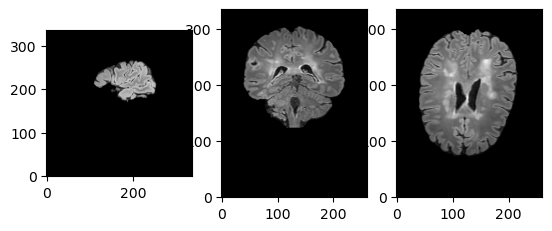

--------------------------------------------------------------------------------
flair image shape is (261, 336, 336)
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Showing lesions now
--------------------------------------------------------------------------------


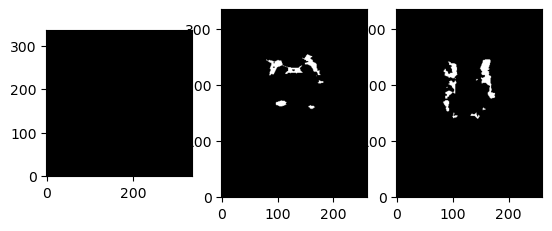

In [6]:
slice_0 = flair[50, :, :]
slice_1 = flair[:,220,:]
slice_2 = flair[:, :, 240]
show_slices([slice_0, slice_1, slice_2])

print("{0}".format(80 * "-"))
print("flair image shape is {0}".format(flair.shape))
print("{0}\n".format(80 * "-"))

print("{0}".format(80 * "-"))
print("Showing lesions now")
print("{0}".format(80 * "-"))


slice_0 = lesion[50, :, :]
slice_1 = lesion[:,220,:]
slice_2 = lesion[:, :, 240]
show_slices([slice_0, slice_1, slice_2])

In [7]:
import pandas as pd 
# Calculate the different lesion volumes
# https://forum.image.sc/t/extract-3d-measurements-volume-centroid-etc-from-masked-stack/43444
from skimage import data, util, measure, morphology

mask = lesion > 0
#We clean the lesion volume of a very small lesions
mask = morphology.remove_small_objects(mask, min_size=30) 
label_image = measure.label(mask, connectivity=lesion.ndim)

#
props = measure.regionprops(label_image)
properties = ['label', 'area', 'centroid', 
              'axis_major_length', 'axis_minor_length']

props_table = measure.regionprops_table(label_image,
                           properties=properties)


print("{0}".format(80 * "-"))
print("Printing corresponding properties for that lesion")
print("{0}".format(80 * "-"))

data = pd.DataFrame(props_table)  
print(data)

--------------------------------------------------------------------------------
Printing corresponding properties for that lesion
--------------------------------------------------------------------------------
    label   area  centroid-0  centroid-1  centroid-2  axis_major_length  \
0       1  55366  137.190261  222.507315  232.830907         142.817253   
1       2     57   72.789474  183.122807  275.719298           7.259696   
2       3    566   79.104240  208.600707  195.254417          17.031013   
3       4     92   85.163043  117.619565  228.021739           7.994836   
4       5    602   90.553156  110.779070  221.448505          13.655319   
5       6   1308   99.996942  143.151376  245.194190          19.578696   
6       7     53   93.000000  163.132075  253.132075           7.617786   
7       8    426  102.061033  122.387324  213.584507          28.999505   
8       9    153   99.836601   99.320261  214.869281           9.269519   
9      10   2917  108.354131  213.3829

--------------------------------------------------------------------------------
Testing test function ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Plotting of 2d test function ...
--------------------------------------------------------------------------------


/tmp/ipykernel_62862/1730932696.py:16: RuntimeWarning: divide by zero encountered in true_divide
  f = np.exp(-(0.1 / (10 - Z) * (10 - Z))) * np.exp(-0.1 / ((Z**2))) * \
/tmp/ipykernel_62862/1730932696.py:16: RuntimeWarning: invalid value encountered in multiply
  f = np.exp(-(0.1 / (10 - Z) * (10 - Z))) * np.exp(-0.1 / ((Z**2))) * \
/tmp/ipykernel_62862/1730932696.py:17: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-(0.1 / (10 - Y) * (10 - Y))) * np.exp(-0.1 / ((Y**2)))
/tmp/ipykernel_62862/1730932696.py:17: RuntimeWarning: invalid value encountered in multiply
  np.exp(-(0.1 / (10 - Y) * (10 - Y))) * np.exp(-0.1 / ((Y**2)))


Text(0.5, 0.92, 'Test function in 2D with 100 number of samples')

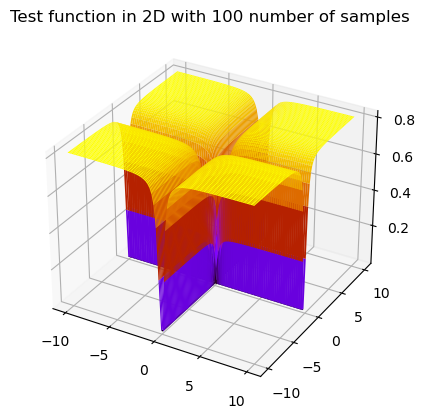

In [8]:
from mpl_toolkits.mplot3d import Axes3D

def TestFun2d(z_list, y_list):
    # Building the test function of the form: 
    #--> exp(-(1 / (10 - x) (10 - x))) * exp(- 1 / (x *x))
    
    z = np.linspace(z_list[0], z_list[1], num=z_list[2])
    y = np.linspace(y_list[0], y_list[1], num=y_list[2])
    
    # Transforming to meshgrid
    Z, Y = np.meshgrid(z, y)
    Y[Y==0] = 1.0e-6
    Z[Z==0] = 1.0e-6
     
    # Main function
    f = np.exp(-(0.1 / (10 - Z) * (10 - Z))) * np.exp(-0.1 / ((Z**2))) * \
                np.exp(-(0.1 / (10 - Y) * (10 - Y))) * np.exp(-0.1 / ((Y**2)))
      

    f_params_2d = [f, Z, Y]
    
    return f_params_2d

print("{0}".format(80 * "-"))
print("Testing test function ...")
print("{0}".format(80 * "-"))

num_samples = 100
z_list = [-10, 10, num_samples]
y_list = [-10, 10, num_samples]

f, Z, Y = TestFun2d(z_list, y_list)

print("{0}".format(80 * "-"))
print("Plotting of 2d test function ...")
print("{0}".format(80 * "-"))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Z, Y, f, rstride=1, cstride=1, cmap='gnuplot')
ax.set_title("Test function in 2D with {0} number of samples".format(num_samples))



--------------------------------------------------------------------------------
Testing test function ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Plotting of 2d test function ...
--------------------------------------------------------------------------------


Text(0.5, 0.92, 'Test function in 2D with 100 number of samples')

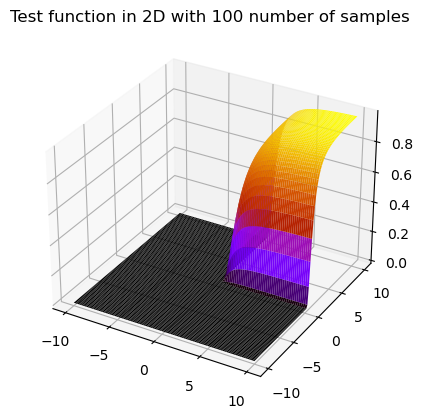

In [9]:
from mpl_toolkits.mplot3d import Axes3D

def TestSimpleFun2d(z_list, y_list):
    # Building the test function of the form: 
    #--> np.exp(-1/(t_vals**2))
    
    z = np.linspace(z_list[0], z_list[1], num=z_list[2])
    y = np.linspace(y_list[0], y_list[1], num=y_list[2])
    
    # Transforming to meshgrid
    Z, Y = np.meshgrid(z, y)
    Y[Y==0] = 1.0e-6
    Z[Z==0] = 1.0e-6
     
    # Main function
    f = np.exp(-1/(Z**2)) * np.exp(-1/(Y**2))
               
    # Eliminate the zero and negative values:
    f [Y<=0] = 0
    f [Z<=0] = 0
      

    f_params_2d = [f, Z, Y]
    
    return f_params_2d

print("{0}".format(80 * "-"))
print("Testing test function ...")
print("{0}".format(80 * "-"))

num_samples = 100
z_list = [-10, 10, num_samples]
y_list = [-10, 10, num_samples]

f, Z, Y = TestSimpleFun2d(z_list, y_list)

print("{0}".format(80 * "-"))
print("Plotting of 2d test function ...")
print("{0}".format(80 * "-"))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Z, Y, f, rstride=1, cstride=1, cmap='gnuplot')
ax.set_title("Test function in 2D with {0} number of samples".format(num_samples))



--------------------------------------------------------------------------------
Testing 3d test function ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Plotting of test function ...
--------------------------------------------------------------------------------


Text(0.5, 0.92, 'Test function in 3D with 100 number of samples')

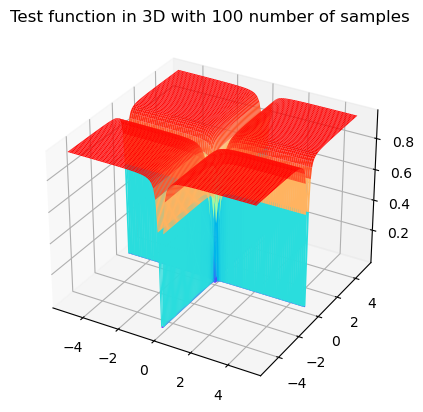

In [10]:
def TestFun3d(z_list, y_list, x_list):
    # Building the test function of the form: 
    #--> exp(-(1 / (10 - x) (10 - x))) * exp(- 1 / (x *x))
    
    z = np.linspace(z_list[0], z_list[1], num=z_list[2])
    y = np.linspace(y_list[0], y_list[1], num=y_list[2])
    x = np.linspace(x_list[0], x_list[1], num=x_list[2])
    
    # Transforming to meshgrid
    Z, Y, X = np.meshgrid(z, y, x)
    X[X==0] = 1.0e-6
    Y[Y==0] = 1.0e-6
    Z[Z==0] = 1.0e-6
    
    f = np.exp(-(0.01 / (10 - Z) * (10 - Z))) * np.exp(-0.01 / ((Z**2))) * \
            np.exp(-(0.01 / (10 - Y) * (10 - Y))) * np.exp(-0.01 / ((Y**2))) * \
                  np.exp(-(0.01 / (10 - X) * (10 - X))) * np.exp(-0.01 / ((X**2)))
        

    f_params = [f, Z, Y, X]
    
    return f_params

print("{0}".format(80 * "-"))
print("Testing 3d test function ...")
print("{0}".format(80 * "-"))

num_samples = 100
z_list = [-5, 5, num_samples]
y_list = [-5, 5, num_samples]
x_list = [-5, 5, num_samples]

f, Z, Y, X = TestFun3d(z_list, y_list, x_list)

print("{0}".format(80 * "-"))
print("Plotting of test function ...")
print("{0}".format(80 * "-"))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Z[:,:,60], Y[:,:,60], f[:,:,60], rstride=1, cstride=1, cmap='rainbow')
ax.set_title("Test function in 3D with {0} number of samples".format(num_samples))


In [13]:
from scipy.ndimage.morphology import distance_transform_edt 
# Source --> https://stackoverflow.com/questions/44770396/how-does-the-scipy-distance-transform-edt-function-work
# Lesions need to be treated separately
# Perfect dist func is of the form: --> exp(-(1 / (10 - x) (10 - x))) * exp(- 1 / (x *x))
dict_dist = {}
total_components = 10
total_harms = [comp for comp in range(total_components)]

for ind in np.nditer(props_table['label']):
    region = label_image==ind
    res = np.where(region == True)
    
    # Need to crop the image
    s_min = min(res[0])
    s_max = max(res[0])
    x_min = min(res[1])
    x_max = max(res[1])
    y_min = min(res[2])
    y_max = max(res[2])

    # We need to use sparse arrays
    cropped_brain = region[s_min:s_max, x_min:x_max, y_min:y_max]
    cropped_flair = flair[s_min:s_max, x_min:x_max, y_min:y_max]
    cropped_gado = gado[s_min:s_max, x_min:x_max, y_min:y_max]
    edt, inds = distance_transform_edt(cropped_brain!=0, return_indices=True) 
    
    d_max = np.max(edt)
    
    #Adding to the dictionary
    dict_dist[int(ind)] = {}
    dict_dist[int(ind)]["harmonics"] = {}
    dict_dist[int(ind)]["edt"] = edt
    dict_dist[int(ind)]["max_dist"] = d_max
    dict_dist[int(ind)]["flair"] = cropped_flair
    dict_dist[int(ind)]["gado"] = cropped_gado
    dict_dist[int(ind)]["gt"] = cropped_brain
    dict_dist[int(ind)]["harmonics"]["list"] = []
    
    #total_amfm = 0
    for count, harm in enumerate(total_harms): 
        amp = edt > 0
        amp = amp.astype(int)
        
        '''
        Appying exponential basis function of the form:
        exp(j * (n / M) * dist)
        ------------------------
        Then applying test function
        
        '''
        #edt = np.exp(-(1 / (10 - edt) * (10 - edt))) * np.exp(-1 / (edt**2))
        amfm = amp * np.exp(1j * harm *(edt / d_max)*2*np.pi) 
        # --> TODO: add gradient; perhaps get only real and imag from complex
        #amfm = amp * np.sin(harm *(edt / d_max)*2*np.pi) 
        # Try to zero pad so that you can multiply wiht test function
        
        # Calling test function
        z, y, x = amfm.shape
        num_samples_z = z
        num_samples_y = y
        num_samples_x = x
        
        z_list = [-5, 5, num_samples_z]
        y_list = [-5, 5, num_samples_y]
        x_list = [-5, 5, num_samples_x]
        
        f, Z, Y, X = TestFun3d(y_list, z_list, x_list) # Why swap it works when swapping directions???
        
        print("{0}".format(80 * "-"))
        print("Not Applying test function yet ...")
        print("{0}".format(80 * "-"))
        
        #amfm *= f 
        
        dict_dist[int(ind)]["harmonics"]["list"].append(amfm)
    
    
    # Transposed array
    total_list = dict_dist[int(ind)]["harmonics"]["list"]
    array_basis = np.array([comp.flatten() for comp in total_list]).T
    dict_dist[int(ind)]["harmonics"]["array"] = array_basis
    
    

/tmp/ipykernel_62862/2586621637.py:1: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import distance_transform_edt


--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
---------------

--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
---------------

--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
---------------

--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
---------------

--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Not Applying test function yet ...
--------------------------------------------------------------------------------
---------------

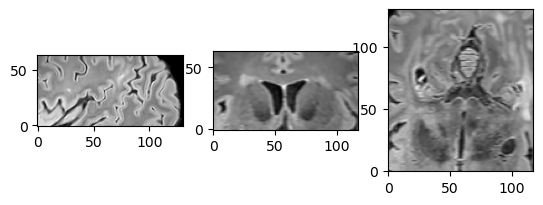

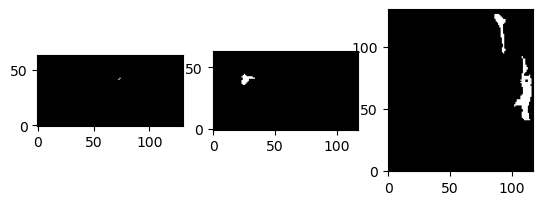

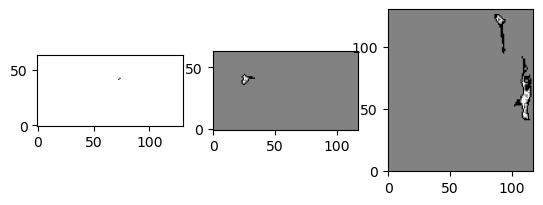

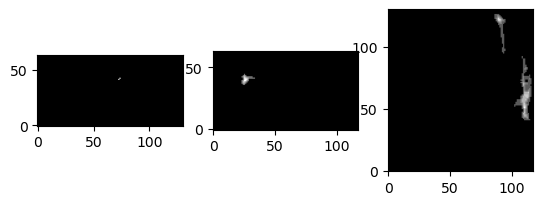

In [18]:
DC_complex = dict_dist[1]["harmonics"]["list"][0]
DC = np.real(DC_complex)

harm_1_complex = dict_dist[1]["harmonics"]["list"][4]
harm_1 = np.real(harm_1_complex)


flair = dict_dist[1]["flair"]

edt = dict_dist[1]["edt"]


sl_= 4
sx_ = 4
sy_ = 4

flair_0 = flair[sl_ , :, :]
flair_1 = flair[:, sx_, :]
flair_2 = flair[:, :, sy_]

DC_0 = DC[sl_ , :, :]
DC_1 = DC[:, sx_, :]
DC_2 = DC[:, :, sy_]

harm_1_l = harm_1[sl_ , :, :]
harm_1_x = harm_1[:, sx_, :]
harm_1_y = harm_1[:, :, sy_]

edt_l = edt[sl_ , :, :]
edt_x = edt[:, sx_, :]
edt_y = edt[:, :, sy_]

show_slices([flair_0, flair_1, flair_2], 'gray')
show_slices([DC_0, DC_1, DC_2], 'gray')
show_slices([harm_1_l, harm_1_x, harm_1_y], 'gray')
show_slices([edt_l, edt_x, edt_y], 'gray')

In [32]:
np.unique(harm_1 )

array([-0.99938947, -0.99580648, -0.98492684, -0.96920402, -0.96145783,
       -0.94477732, -0.93578089, -0.91605566, -0.90637953, -0.76776774,
       -0.69674281, -0.67071745, -0.61529708, -0.58021779, -0.5       ,
       -0.5       , -0.37417212, -0.36462307, -0.35739308, -0.1791914 ,
       -0.17715522, -0.10027622,  0.        ,  0.0355903 ,  0.12408864,
        0.13303519,  0.15987567,  0.18549272,  0.20487111,  0.34075817,
        0.36997793,  0.44093076,  0.45975736,  0.47307004,  0.58269964,
        0.698418  ,  0.75267363,  0.84880232,  0.87871285,  0.90830734,
        0.93612863,  0.97253619,  0.97353061,  0.99319634,  1.        ])

In [ ]:
np.unique(np.real(harm_1_complex))

In [ ]:
# Example of array basis
basis = dict_dist[12]["harmonics"]["array"]

# Applying SVD
u, s, vh = scipy.linalg.svd(basis)
rank = np.linalg.matrix_rank(basis)
row, col = np.shape(basis)
v_null = vh[:, rank:]
u_left_null = u[:, rank:]



In [ ]:
from scipy.linalg import lstsq

les = 12
array_basis = dict_dist[les]["harmonics"]["array"] 
dc = dict_dist[les]["harmonics"]["list"][0]
c_1 = dict_dist[les]["harmonics"]["list"][1]
lesion_flair = dict_dist[les]["flair"]
lesion_gado = dict_dist[les]["gado"]
edt = dict_dist[les]["edt"]
gt = dict_dist[les]["gt"]


sl, x, y = lesion_flair.shape

#u, s, vh = np.linalg.svd(array_basis)
inv_basis = np.linalg.pinv(array_basis)

b = lesion_flair.flatten()
b = np.reshape(b, (-1, 1))

b_gado = lesion_gado.flatten()
b_gado = np.reshape(b_gado, (-1, 1))
#
p, res, rnk, s = lstsq(array_basis, b)
p_gado, res_gado, rnk_gado, s_gado = lstsq(array_basis, b_gado)
#
tmp = array_basis @ p
recon_flair = tmp.reshape((sl, x, y))

tmp = array_basis @ p_gado
recon_gado = tmp.reshape((sl, x, y))



# Saving matrices
np.save("Matrix_A.npy", array_basis)
np.save("Flair_lesion.npy", lesion_flair)


In [ ]:
plt.plot(s)
print(u.shape)

In [ ]:
projected_b = u_left_null @ np.matrix(u_left_null).getH() @ b

In [ ]:
print(projected_b.shape)
print(lesion_flair.shape)
print(sl)
projected_b = np.array(projected_b)
projected_b = projected_b.ravel().reshape((sl, x, y))

In [ ]:
harm = recon_flair
sl_= 4
sx_ = 4
sy_ = 4
tot_b = edt + projected_b

slice_0 = harm[sl_, :, :]
slice_1 = harm[:,sx_,:]
slice_2 = harm[:, :, sy_]

flair_0 = lesion_flair[sl_, :, :]
flair_1 = lesion_flair[:,sx_,:]
flair_2 = lesion_flair[:, :, sy_] 

edt_0 = edt[sl_, :, :]
edt_1 = edt[:,sx_,:]
edt_2 = edt[:, :, sy_]

gt_0 = gt[sl_, :, :]
gt_1 = gt[:,sx_,:]
gt_2 = gt[:, :, sy_]

dc_0 = dc[sl_, :, :]
dc_1 = dc[:,sx_,:]
dc_2 = dc[:, :, sy_]

c_0 = c_1[sl_, :, :]
c_11 = c_1[:,sx_,:]
c_2 = c_1[:, :, sy_]

proj_b_0 = projected_b[sl_, :, :]
proj_b_1 = projected_b[:, sl_, :]
proj_b_2 = projected_b[:, :, sl_]

tot_b_0 = tot_b[sl_, :, :]
tot_b_1 = tot_b[:, sl_, :]
tot_b_2 = tot_b[:, :, sl_]


'''
slice_0 = lesion_gado[4, :, :]
slice_1 = lesion_gado[:,6,:]
slice_2 = lesion_gado[:, :, 11]

gado_0 = recon_gado[4, :, :]
gado_1 = recon_gado[:,6,:]
gado_2 = recon_gado[:, :, 11]
'''
show_slices([slice_0, slice_1, slice_2], 'gray')
show_slices([flair_0, flair_1, flair_2], 'gray')
show_slices([proj_b_0, proj_b_1, proj_b_2], 'gray')
show_slices([edt_0, edt_1, edt_2], 'gray')
#show_slices([tot_b_0, tot_b_1, tot_b_2], 'gray')
show_slices([gt_0, gt_1, gt_2], 'gray')
contour_slices([edt_0, edt_1, edt_2], 'gray')

In [ ]:
harm = recon_flair
sl_= 4
sx_ = 4
sy_ = 4

slice_0 = harm[sl_, :, :]
slice_1 = harm[:,sx_,:]
slice_2 = harm[:, :, sy_]

flair_0 = lesion_flair[sl_, :, :]
flair_1 = lesion_flair[:,sx_,:]
flair_2 = lesion_flair[:, :, sy_] 

edt_0 = edt[sl_, :, :]
edt_1 = edt[:,sx_,:]
edt_2 = edt[:, :, sy_]

gt_0 = gt[sl_, :, :]
gt_1 = gt[:,sx_,:]
gt_2 = gt[:, :, sy_]

dc_0 = dc[sl_, :, :]
dc_1 = dc[:,sx_,:]
dc_2 = dc[:, :, sy_]

c_0 = c_1[sl_, :, :]
c_11 = c_1[:,sx_,:]
c_2 = c_1[:, :, sy_]
'''
slice_0 = lesion_gado[4, :, :]
slice_1 = lesion_gado[:,6,:]
slice_2 = lesion_gado[:, :, 11]

gado_0 = recon_gado[4, :, :]
gado_1 = recon_gado[:,6,:]
gado_2 = recon_gado[:, :, 11]
'''
show_slices([slice_0, slice_1, slice_2], 'gray')
show_slices([flair_0, flair_1, flair_2], 'gray')
show_slices([edt_0, edt_1, edt_2], 'gray')
show_slices([gt_0, gt_1, gt_2], 'gray')
contour_slices([edt_0, edt_1, edt_2], 'gray')

In [ ]:
fig, axes = plt.subplots(1, 2)
slices = [flair_0[75:175, 0:60], edt_0[75:175, 0:60]]
for i, slice in enumerate(slices):
    im = axes[i].imshow(slice.T, cmap=cmap, origin="lower")
        
plt.show()

In [ ]:
slice = edt_0[75:175, 0:60]
row, col = np.shape(slice)
y = np.arange(0, row)
x = np.arange(0, col)
xx, yy = np.meshgrid(x, y)
cmap='gray'
contour_levels = 6
zzmin, zzmax = np.min(slice), np.max(slice)
levels = np.linspace(zzmin, zzmax, contour_levels)

fig, axes = plt.subplots(1,1, figsize=(20,20))
#Display image with contour plot
i=0
im = axes.imshow(slice.T, cmap=cmap, origin="lower")
contour = axes.contour(yy, xx, slice, levels)
axes.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
c = ('#ff0000', '#ffff00', '#0000FF', '0.6', 'c', 'm')
contour_filled = axes.contourf(yy, xx, slice, colors=c)
plt.colorbar(contour_filled)

plt.show()

In [ ]:
edt_0[127,26]

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

rgr_ridge = Ridge(alpha=0.3, max_iter=10000)
rgr_ridge.fit(array_basis, b)
coeff = rgr_ridge.coef_
intercepts = rgr_ridge.intercept_

tmp = array_basis @ coeff.T + intercepts
recon_flair = tmp.reshape((sl, x, y))

In [ ]:
harm = recon_flair
sl_= 3
sx_ = 4
sy_ = 4



slice_0 = harm[sl_, :, :]
slice_1 = harm[:,sx_,:]
slice_2 = harm[:, :, sy_]

flair_0 = lesion_flair[sl_, :, :]
flair_1 = lesion_flair[:,sx_,:]
flair_2 = lesion_flair[:, :, sy_] 

edt_0 = edt[sl_, :, :]
edt_1 = edt[:,sx_,:]
edt_2 = edt[:, :, sy_]

gt_0 = gt[sl_, :, :]
gt_1 = gt[:,sx_,:]
gt_2 = gt[:, :, sy_]

dc_0 = dc[sl_, :, :]
dc_1 = dc[:,sx_,:]
dc_2 = dc[:, :, sy_]

c_0 = c_1[sl_, :, :]
c_11 = c_1[:,sx_,:]
c_2 = c_1[:, :, sy_]
'''
slice_0 = lesion_gado[4, :, :]
slice_1 = lesion_gado[:,6,:]
slice_2 = lesion_gado[:, :, 11]

gado_0 = recon_gado[4, :, :]
gado_1 = recon_gado[:,6,:]
gado_2 = recon_gado[:, :, 11]
'''
show_slices([slice_0, slice_1, slice_2], 'gray')
show_slices([flair_0, flair_1, flair_2], 'gray')
show_slices([edt_0, edt_1, edt_2], 'gray')
show_slices([gt_0, gt_1, gt_2], 'gray')
contour_slices([edt_0, edt_1, edt_2], 'gray')

In [ ]:
# Get the isocontours.
# Source --> https://stackoverflow.com/questions/6030098/how-to-display-a-3d-plot-of-a-3d-array-isosurface-in-matplotlib-mplot3d-or-simil/35472146
edt = dict_dist[3]["edt"] 
level = 1.0
verts, faces, normals, values = measure.marching_cubes(edt)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
plt.show()


In [ ]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('g')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 364)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 427)  # b = 10
ax.set_zlim(0, 437)  # c = 16

plt.tight_layout()
plt.show()

In [ ]:
# Getting coordinates of each face
coord = verts[faces]

In [ ]:
np.max(array_basis)